# Delhi Temperature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
test_df= pd.read_csv('DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv')

In [3]:
train_df = pd.read_csv('DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv')

In [4]:
train_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [5]:
train_df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [6]:
train_df1 = train_df.copy()

In [7]:
train_df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
train_df = train_df.set_index('date') 

In [9]:
train_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


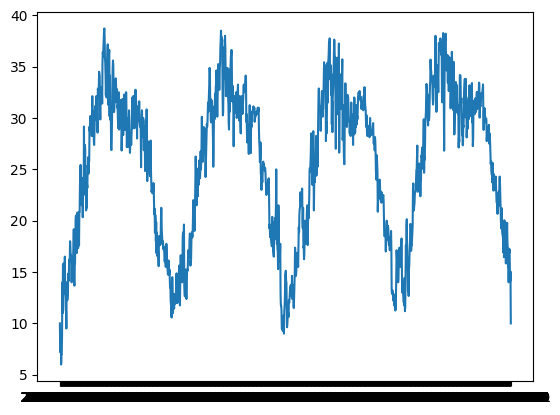

In [10]:
plt.plot('meantemp',data=train_df)

# Task 1

In [11]:
moving_average1=train_df["meantemp"].rolling(window=30).mean()
moving_average1

date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05          NaN
                ...    
2016-12-28    18.164807
2016-12-29    17.952373
2016-12-30    17.759896
2016-12-31    17.603317
2017-01-01    17.296372
Name: meantemp, Length: 1462, dtype: float64

In [12]:
moving_average2=train_df["meantemp"].rolling(window=60).mean()
moving_average2

date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05          NaN
                ...    
2016-12-28    20.692491
2016-12-29    20.532691
2016-12-30    20.358637
2016-12-31    20.203104
2017-01-01    19.974316
Name: meantemp, Length: 1462, dtype: float64

In [13]:
moving_average3=train_df["meantemp"].rolling(window=90).mean()
moving_average3

date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05          NaN
                ...    
2016-12-28    23.580125
2016-12-29    23.391501
2016-12-30    23.186541
2016-12-31    22.989183
2017-01-01    22.730636
Name: meantemp, Length: 1462, dtype: float64

In [14]:
new_df1=pd.DataFrame({'observed':train_df['meantemp'],"new temp":moving_average1})

In [15]:
new_df1

,observed,new temp
date,,
2013-01-01,10.000000,NaN
2013-01-02,7.400000,NaN
2013-01-03,7.166667,NaN
2013-01-04,8.666667,NaN
2013-01-05,6.000000,NaN
...,...,...
2016-12-28,17.217391,18.164807
2016-12-29,15.238095,17.952373
2016-12-30,14.095238,17.759896


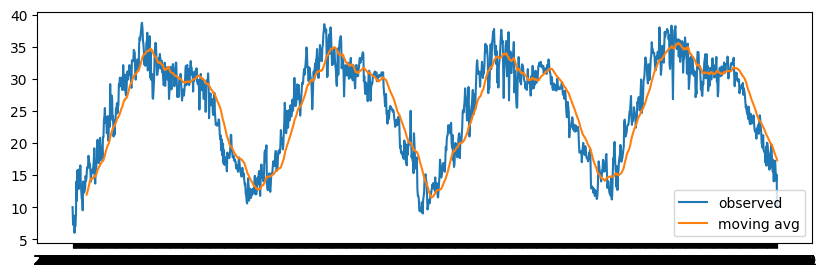

In [16]:
plt.figure(figsize=(10,3))
plt.plot(new_df1,label=['observed','moving avg'])
plt.legend()
plt.show()

In [17]:
moving_average4=train_df["meantemp"].rolling(window=7).mean()
moving_average4

date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05          NaN
                ...    
2016-12-28    16.480592
2016-12-29    16.188075
2016-12-30    15.980252
2016-12-31    15.656602
2017-01-01    15.085173
Name: meantemp, Length: 1462, dtype: float64

In [18]:
new_df4=pd.DataFrame({'observed':train_df['meantemp'],"new temp":moving_average4})

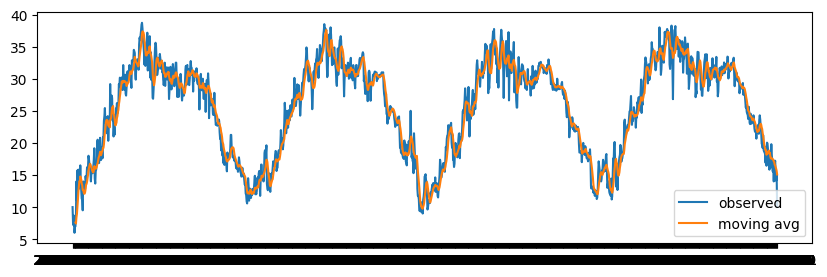

In [19]:
plt.figure(figsize=(10,3))
plt.plot(new_df4,label=['observed','moving avg'])
plt.legend()
plt.show()

In [20]:
new_df4

,observed,new temp
date,,
2013-01-01,10.000000,NaN
2013-01-02,7.400000,NaN
2013-01-03,7.166667,NaN
2013-01-04,8.666667,NaN
2013-01-05,6.000000,NaN
...,...,...
2016-12-28,17.217391,16.480592
2016-12-29,15.238095,16.188075
2016-12-30,14.095238,15.980252


In [21]:
new_df2=pd.DataFrame({'observed':train_df['meantemp'],"new temp":moving_average2})

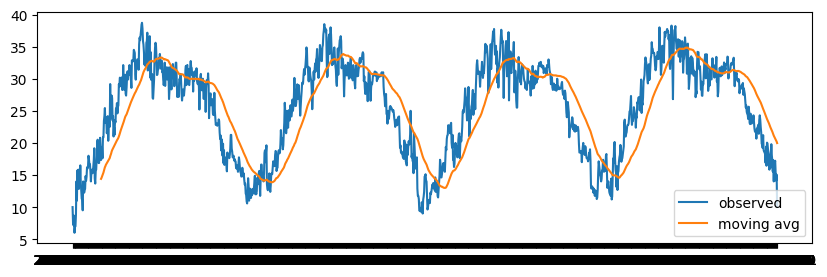

In [22]:
plt.figure(figsize=(10,3))
plt.plot(new_df2,label=['observed','moving avg'])
plt.legend()
plt.show()

In [23]:
# the data looks smooth for the window 60

**Task2**

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(train_df['meantemp'])
p_value=result[1]

In [26]:
p_value

0.27741213723016056

In [27]:
#p_value>0.05 
# non statitonary

In [28]:
df_diff=train_df['meantemp']-train_df['meantemp'].shift(1)

In [29]:
df_diff.dropna(inplace=True)

In [30]:
result=adfuller(df_diff)
p_value=result[1]

In [31]:
p_value

2.764863137594368e-29

In [32]:
#P_value<0.05  
#it is stationary

<Axes: xlabel='date'>

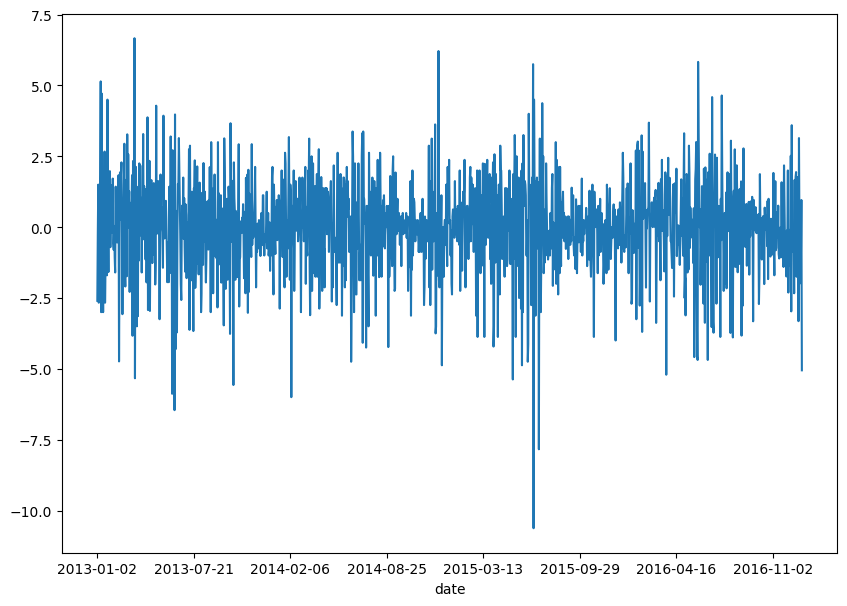

In [33]:
df_diff.plot(figsize=(10,7))

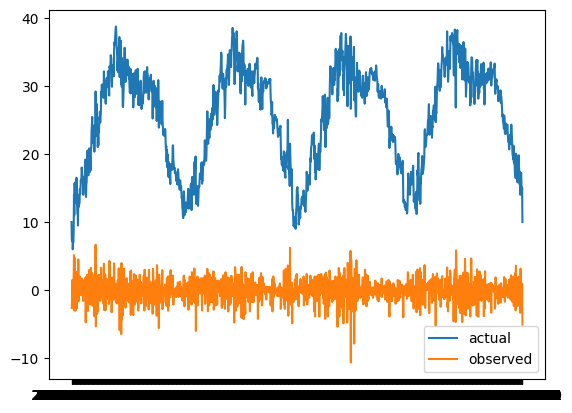

In [34]:
plt.plot(train_df['meantemp'],label='actual')
plt.plot(df_diff,label='observed')
plt.legend()
plt.show()

In [35]:
result = adfuller(test_df['meantemp'])
p_value=result[1]

In [36]:
p_value

0.7164758731775932

In [37]:
df_diff1=test_df['meantemp']-test_df['meantemp'].shift(1)

In [38]:
df_diff1.dropna(inplace=True)

In [39]:
result=adfuller(df_diff1)
p_value=result[1]

In [40]:
p_value

2.8053213689778235e-22

**Task3**

In [41]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

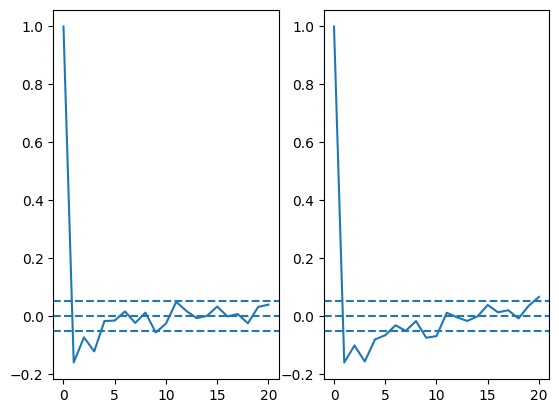

In [42]:
lag_acf=acf(df_diff,nlags=20)
lag_pacf=pacf(df_diff,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--')

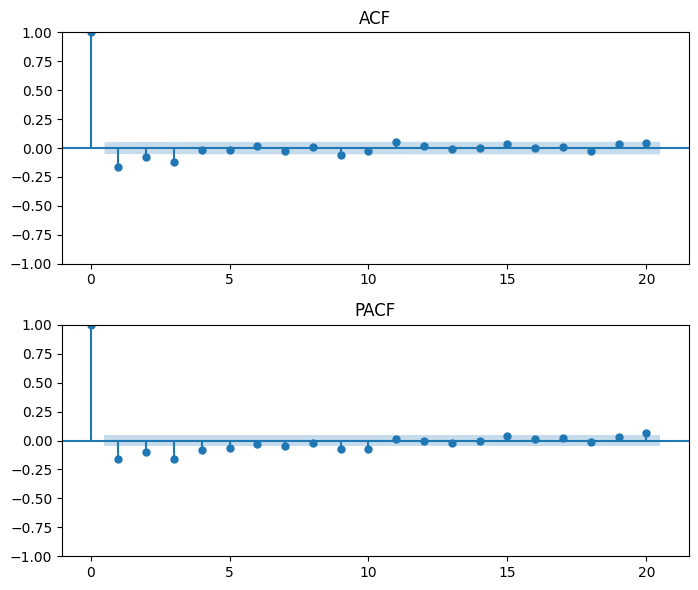

In [43]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(7,6))

#acf plot
plot_acf(df_diff,lags=20,ax=ax[0])
ax[0].set_title("ACF")


#pacf plot
plot_pacf(df_diff,lags=20,ax=ax[1])
ax[1].set_title("PACF")

plt.tight_layout()

In [44]:
p=1
q=0
d=0
ar_m1=sm.tsa.ARIMA(df_diff,order=(p,d,q)).fit()
ar_m1.aic

C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


5614.068005693249

In [45]:
p_values = range(1,21)

for p in p_values:
    d=0
    q=0
    ar_m=sm.tsa.ARIMA(df_diff,order=(p,d,q)).fit()
    aric=ar_m.aic
    print(f"AIC for p={p}: {aric}")    

C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

AIC for p=1: 5614.068005693249
AIC for p=2: 5600.849349214089
AIC for p=3: 5566.336500977452
AIC for p=4: 5558.748479570737


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

AIC for p=5: 5554.289155737285


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=6: 5554.763524915977


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=7: 5552.916506460417


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=8: 5554.463069033818


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=9: 5548.1696415797105


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=10: 5543.034339821601


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=11: 5544.865065252493


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=12: 5546.831402537836


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=13: 5548.384017822701


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=14: 5550.380130264891


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=15: 5550.3226941821185


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=16: 5552.095913969172


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=17: 5553.545559679065


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=18: 5555.43935655516


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=19: 5555.66895674


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for p=20: 5551.403381032082


In [46]:
# for p= 10 , aic is lowest , AutoRegressionAR(10)

In [47]:
# MA 

In [48]:
q_values = range(1,11)

for q in q_values:
    d=0
    p=0
    ar_m=sm.tsa.ARIMA(df_diff,order=(p,d,q)).fit()
    aric=ar_m.aic
    print(f"AIC for q={q}: {aric}")   

AIC for q=1: 5602.113795706256


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

AIC for q=2: 5573.723119962491
AIC for q=3: 5542.491619889063


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

AIC for q=4: 5542.658421118302


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for q=5: 5544.070165509816


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for q=6: 5546.068029345095


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for q=7: 5547.404170719176


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for q=8: 5548.852194959744


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for q=9: 5549.309975899963


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for q=10: 5550.7142098837185


In [49]:
# for q =3 , aic is lowest , MR(3) best model

In [50]:
for i in range(7,11):
    for j in range(1,4):
        ar_ml=sm.tsa.ARIMA(df_diff,order=(i,0,j)).fit()
        print(f'{i} {j} :',ar_ml.aic)

C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


7 1 : 5548.014813106454


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


7 2 : 5550.1490254001565


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

7 3 : 5547.540094108143
8 1 : 5549.631568750776


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


8 2 : 5551.957764124729


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

8 3 : 5552.076567073969
9 1 : 5545.528483768507


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


9 2 : 5546.672917503348


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


9 3 : 5546.533531887428


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


10 1 : 5544.8581517975235


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


10 2 : 5546.8518290896645


C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


10 3 : 5548.294807378419


In [51]:
p=10
q=1
d=0
ar_m2=sm.tsa.ARIMA(df_diff,order=(p,d,q)).fit()
ar_m2.aic

C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


5544.8581517975235

In [52]:
pred_data=ar_m2.predict(0,len(test_df)-1)

In [53]:
pred_data

2013-01-02    0.002650
2013-01-03    0.421793
2013-01-04    0.310393
2013-01-05    0.153355
2013-01-06    0.594048
                ...   
2013-04-21   -0.239428
2013-04-22    0.622980
2013-04-23    0.176288
2013-04-24    0.434007
2013-04-25   -0.576938
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

In [56]:
lb_p_val = acorr_ljungbox(ar_m2.resid, lags = [20], return_df = True)
lb_p_val

,lb_stat,lb_pvalue
20,14.706455,0.792951


In [57]:
#pvalue>0.05 , Good model

In [59]:
test_df=test_df.set_index("date")

In [60]:
test_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [61]:
errors = []

for val1, val2 in zip(test_df['meantemp'], pred_data):
    error = val1 - val2
    errors.append(error)

In [62]:
errors

[15.91039352884305,
 18.078206704758937,
 16.80071859192378,
 18.546644667537983,
 17.794841017951587,
 19.197056927696703,
 14.40448704082561,
 15.95902362317389,
 15.869674375472192,
 12.494068224118779,
 12.5339085186651,
 12.491927988050643,
 14.494981360481336,
 13.147618989122469,
 17.37723756736767,
 14.659852318083225,
 13.086163973245839,
 12.895677333678146,
 14.528917594407098,
 14.637307272451732,
 14.787905299162697,
 17.445738007172885,
 18.46646920934025,
 18.469844875988542,
 21.157562681427425,
 16.140711172097184,
 16.204190144870317,
 15.203397252562178,
 15.957500551685389,
 16.84877861298808,
 16.839474229911147,
 15.966599749218261,
 17.384921116178727,
 16.315091372141577,
 19.164334811474447,
 19.016373128835237,
 17.084134866787096,
 14.880075360197676,
 15.330793195456671,
 15.319172928217842,
 14.37975119730568,
 15.807807425654241,
 16.16291350874524,
 16.375306959761417,
 17.08623131620937,
 18.28468802913194,
 19.641777909734913,
 20.968493556439025,
 20.9

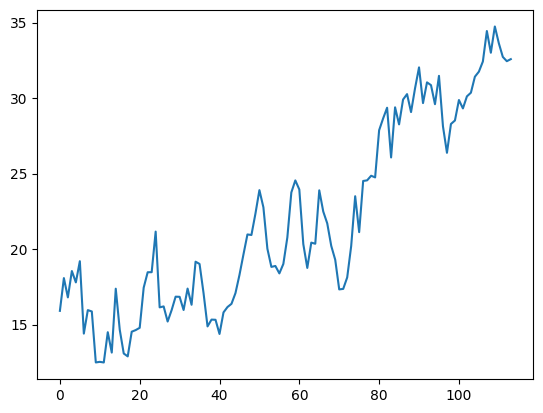

In [64]:
plt.plot(errors)